In [1]:
import json
import findfile
import pandas as pd
import data_utils

In [10]:
category_map = {
    'gameplay': ['gameplay', 'game mode', 'story', 'level design',
                 'multiplayer', 'violence', 'character design',
                 'controls', 'tutorial', 'quality', 'gun play', 'gunplay', 'environment', 'gameplay mechanics',
                 'world',
                 'game environment', 'game design', 'difficulty', 'content', 'cosmetic content', 'in-game content',
                 'options', 'user interface', 'UI', 'interface', 'gameplay', 'game modes', 'gameplay features',
                 'monetization'],
    'price': ['price'],
    'audio_visuals': ['audio_visuals', 'visuals', 'sounds', 'game environment', 'game design', 'visual', 'sound',
                      'audio_visuals', 'graphics', 'music', 'soundtrack', 'sound effects', 'audio'],
    'performance_bugs': ['performance_bugs', 'bugs', 'performance', 'saves', 'developers', 'updates', 'anticheat',
                         'update', 'patch', 'bug', 'crash', 'lag', 'performance', 'server', 'servers',
                         'server issues', 'server performance'],
    'community': ['languages', 'reviews', 'community', 'comparison'],
    'overall': ['overall', 'genre', 'platform', 'game', 'game#overall'],
    'NULL': ['NULL', 'none', None, 'null', '', 'noterm']
}


def categorize(term):
    for category, terms in category_map.items():
        if term in terms:
            return category
    return 'other'


def create_summary_template():
    summary_template = {}
    summary_template['total'] = 0

    summary_template['positive'] = 0
    summary_template['negative'] = 0
    summary_template['neutral'] = 0

    summary_template['gameplay'] = 0
    summary_template['price'] = 0
    summary_template['audio_visuals'] = 0
    summary_template['performance_bugs'] = 0
    summary_template['community'] = 0
    summary_template['overall'] = 0
    summary_template['NULL'] = 0
    summary_template['other'] = 0

    summary_template['terms'] = {}
    summary_template['terms']['gameplay'] = []
    summary_template['terms']['price'] = []
    summary_template['terms']['audio_visuals'] = []
    summary_template['terms']['performance_bugs'] = []
    summary_template['terms']['community'] = []
    summary_template['terms']['overall'] = []
    summary_template['terms']['NULL'] = []
    summary_template['terms']['other'] = []

    summary_template['terms']['neutral'] = []
    summary_template['terms']['positive'] = []
    summary_template['terms']['negative'] = []

    summary_template['opinions'] = {}
    summary_template['opinions']['gameplay'] = []
    summary_template['opinions']['price'] = []
    summary_template['opinions']['audio_visuals'] = []
    summary_template['opinions']['performance_bugs'] = []
    summary_template['opinions']['community'] = []
    summary_template['opinions']['overall'] = []
    summary_template['opinions']['NULL'] = []
    summary_template['opinions']['other'] = []

    summary_template['opinions']['neutral'] = []
    summary_template['opinions']['positive'] = []
    summary_template['opinions']['negative'] = []

    return summary_template


def do_summary(data):
    summary = create_summary_template()
    summary['total'] = len(data)
    for d in data:
        quads = d['Quadruples']
        for q in quads:
            aspect, category, opinion, polarity = q.get('aspect'), q.get('category'), q.get('opinion'), q.get(
                'polarity')
            category = categorize(category)

            try:
                summary[polarity] += 1
            except:
                print(polarity)
                print(q)
                polarity = 'neutral'
            try:
                summary[category] += 1
            except:
                print(category)
                print(q)
                category = 'NULL'

            if aspect != 'NULL':
                summary['terms'][polarity].append(aspect)
                summary['terms'][category].append(aspect)

            if opinion != 'NULL':
                summary['opinions'][polarity].append(opinion)
                summary['opinions'][category].append(opinion)

    return summary




In [11]:
data = {}
output_files = findfile.find_files('checkpoints', 'multitask', 'joint-acos-1335.GamesACOS-finetuned_acos_on_ood_model',
                                   'output')
output_files = [f for f in output_files if f.endswith('.jsonl')]

for file in output_files:
    print("processing file: ", file, " ...")
    with open(file, 'r', encoding='utf8') as f:
        data[file] = {}
        data[file]['data'] = json.load(f)
        data[file]['summary'] = do_summary(data[file]['data'])

#transform data dictionary with text and quadruples to a dataframe
for file, d in data.items():
    quadruples = d['data']
    for sample in d['data']:
        df = pd.DataFrame.from_dict(sample, orient='index').T
        print(df.sample(1))


processing file:  checkpoints\multitask\joint-acos-1333.Games_ACS-on_all_data\checkpoint-1624\inference\appid_668580_czech.txt.output.jsonl  ...
processing file:  checkpoints\multitask\joint-acos-1333.Games_ACS-on_all_data\checkpoint-1624\inference\appid_730_czech.txt.output.jsonl  ...
cant wait for
{'aspect': 'cs', 'category': 'go2', 'opinion': 'performance_bugs', 'polarity': 'cant wait for'}

{'aspect': 'NULL', 'category': 'gameplay', 'opinion': 'NULL', 'polarity': ''}
processing file:  checkpoints\multitask\joint-acos-1335.GamesACOS-acos_finetuned_on_acs_on_all_data\inference\appid_668580_czech.txt.output.jsonl  ...
Eternal
{'aspect': 'FPS game', 'category': 'gameplay', 'opinion': 'best AAA FPS game since Doom', 'polarity': 'Eternal'}
hinder you progres in game
{'aspect': 'NULL', 'category': 'performance_bugs', 'opinion': 'bugs', 'polarity': 'hinder you progres in game'}
processing file:  checkpoints\multitask\joint-acos-1335.GamesACOS-acos_finetuned_on_acs_on_all_data\inference\app

TypeError: string indices must be integers

In [ ]:
for file, d in data.items():
    print(file)
    print(d['summary'])
    print()

In [12]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# bar plot of the number of positive, negative and neutral reviews
for file, d in data.items():
    print(file)
    summary = d['summary']
    plt.bar(['positive', 'negative', 'neutral'], [summary['positive'], summary['negative'], summary['neutral']])
    plt.show()

In [ ]:
# bar plot of the number of reviews per category
for file, d in data.items():
    print(file)
    summary = d['summary']
    plt.bar(['gameplay', 'price', 'audio_visuals', 'performance_bugs', 'community', 'overall', 'NULL'],
            [summary['gameplay'], summary['price'], summary['audio_visuals'], summary['performance_bugs'],
             summary['community'], summary['overall'], summary['NULL']])
    plt.show()

In [ ]:
# wordcloud from the most frequent terms per category
from wordcloud import WordCloud

for file, d in data.items():
    print(file)
    summary = d['summary']
    for category, terms in summary['terms'].items():
        if category == 'other':
            continue
        if len(terms) == 0:
            continue
        print(category)
        wordcloud = WordCloud(width=800, height=400, max_font_size=110, background_color="white").generate(
            ' '.join(terms))
        plt.figure(figsize=(12, 10))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

2023-04-27 13:22:13,463 - DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2023-04-27 13:22:13,464 - DEBUG: findfont: score(FontEntry(fname='D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-27 13:22:13,464 - DEBUG: findfont: score(FontEntry(fname='D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-04-27 13:22:13,464 - DEBUG: findfont: score(FontEntry(fname='D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stret

../../../../integrated_datasets/acos_datasets\1335.GamesACOS\train.main_categories.jsonl
../../../../integrated_datasets/acos_datasets\1335.GamesACOS\test.main_categories.jsonl
../../../../integrated_datasets/acos_datasets\1336.Games\train.main_categories.jsonl
../../../../integrated_datasets/acos_datasets\1336.Games\test.main_categories.jsonl
827
143
456
104


2023-04-27 13:22:13,467 - DEBUG: findfont: score(FontEntry(fname='D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
2023-04-27 13:22:13,467 - DEBUG: findfont: score(FontEntry(fname='D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-04-27 13:22:13,467 - DEBUG: findfont: score(FontEntry(fname='D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
2023-04-27 13:22:13,467 - DEBUG: findfont: score(FontEntry(fname='D:\\PythonProjects\\SentimentA

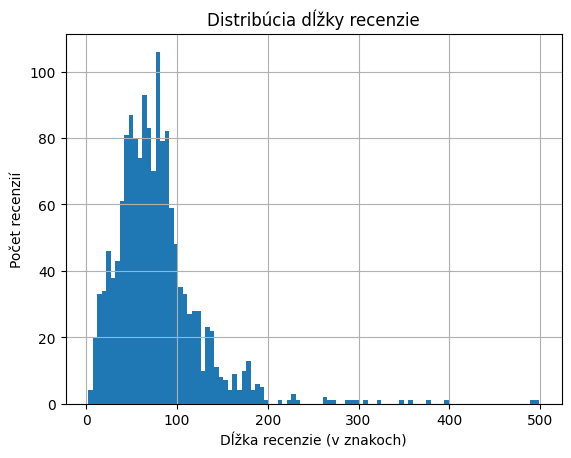

2023-04-27 13:22:13,860 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-27 13:22:13,878 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-27 13:22:13,879 - DEBUG: Writing TrueType font.


GamesACOS.train
audio_visuals
negative: 42 (22.22%)
neutral: 11 (5.82%)
positive: 136 (71.96%)
total: 189 (10.70%)

community
negative: 26 (60.47%)
neutral: 3 (6.98%)
positive: 14 (32.56%)
total: 43 (2.43%)

gameplay
negative: 426 (47.23%)
neutral: 50 (5.54%)
positive: 426 (47.23%)
total: 902 (51.05%)

overall
negative: 118 (53.39%)
neutral: 20 (9.05%)
positive: 83 (37.56%)
total: 221 (12.51%)

performance_bugs
negative: 211 (56.12%)
neutral: 15 (3.99%)
positive: 150 (39.89%)
total: 376 (21.28%)

price
negative: 29 (80.56%)
neutral: 0 (0.00%)
positive: 7 (19.44%)
total: 36 (2.04%)

GamesACOS.test
audio_visuals
negative: 7 (21.21%)
neutral: 1 (3.03%)
positive: 25 (75.76%)
total: 33 (12.74%)

community
negative: 2 (50.00%)
neutral: 1 (25.00%)
positive: 1 (25.00%)
total: 4 (1.54%)

gameplay
negative: 74 (56.06%)
neutral: 9 (6.82%)
positive: 49 (37.12%)
total: 132 (50.97%)

overall
negative: 20 (47.62%)
neutral: 2 (4.76%)
positive: 20 (47.62%)
total: 42 (16.22%)

performance_bugs
negative:

2023-04-27 13:22:13,959 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-27 13:22:13,975 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-27 13:22:13,975 - DEBUG: Writing TrueType font.
2023-04-27 13:22:14,054 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-27 13:22:14,068 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-27 13:22:14,069 - DEBUG: Writing TrueType font.
2023-04-27 13:22:14,145 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-27 13:22:14,159 - DEBUG: Embedding font D:\Python

GamesACOS
audio_visuals
negative: 49 (22.07%)
neutral: 12 (5.41%)
positive: 161 (72.52%)
total: 222 (10.96%)

community
negative: 28 (59.57%)
neutral: 4 (8.51%)
positive: 15 (31.91%)
total: 47 (2.32%)

gameplay
negative: 500 (48.36%)
neutral: 59 (5.71%)
positive: 475 (45.94%)
total: 1034 (51.04%)

overall
negative: 138 (52.47%)
neutral: 22 (8.37%)
positive: 103 (39.16%)
total: 263 (12.98%)

performance_bugs
negative: 231 (57.89%)
neutral: 15 (3.76%)
positive: 153 (38.35%)
total: 399 (19.69%)

price
negative: 36 (59.02%)
neutral: 2 (3.28%)
positive: 23 (37.70%)
total: 61 (3.01%)

GamesACS.train
audio_visuals
negative: 21 (20.79%)
neutral: 3 (2.97%)
positive: 77 (76.24%)
total: 101 (11.40%)

community
negative: 34 (50.75%)
neutral: 4 (5.97%)
positive: 29 (43.28%)
total: 67 (7.56%)

gameplay
negative: 166 (37.30%)
neutral: 46 (10.34%)
positive: 233 (52.36%)
total: 445 (50.23%)

overall
negative: 22 (16.06%)
neutral: 13 (9.49%)
positive: 102 (74.45%)
total: 137 (15.46%)

performance_bugs
n

2023-04-27 13:22:14,239 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-27 13:22:14,255 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-27 13:22:14,255 - DEBUG: Writing TrueType font.
2023-04-27 13:22:14,331 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-27 13:22:14,346 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-27 13:22:14,346 - DEBUG: Writing TrueType font.


GamesACS
audio_visuals
negative: 24 (20.34%)
neutral: 5 (4.24%)
positive: 89 (75.42%)
total: 118 (11.11%)

community
negative: 44 (53.66%)
neutral: 4 (4.88%)
positive: 34 (41.46%)
total: 82 (7.72%)

gameplay
negative: 197 (36.82%)
neutral: 69 (12.90%)
positive: 269 (50.28%)
total: 535 (50.38%)

overall
negative: 29 (17.79%)
neutral: 14 (8.59%)
positive: 120 (73.62%)
total: 163 (15.35%)

performance_bugs
negative: 79 (60.31%)
neutral: 9 (6.87%)
positive: 43 (32.82%)
total: 131 (12.34%)

price
negative: 18 (54.55%)
neutral: 0 (0.00%)
positive: 15 (45.45%)
total: 33 (3.11%)



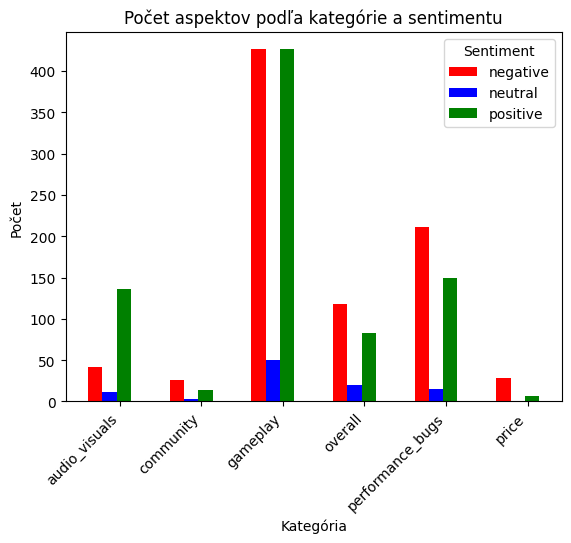

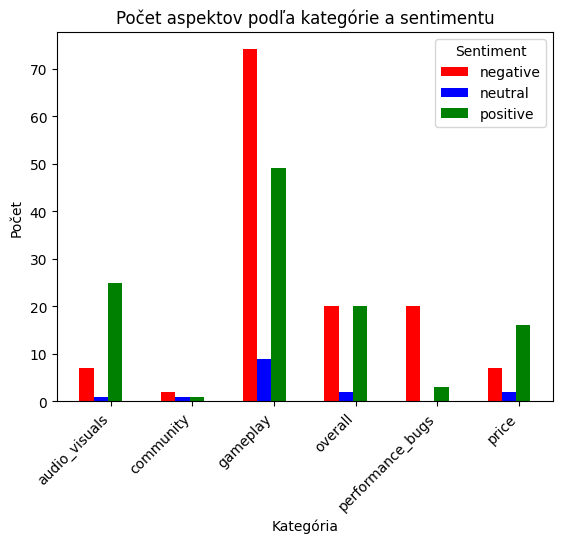

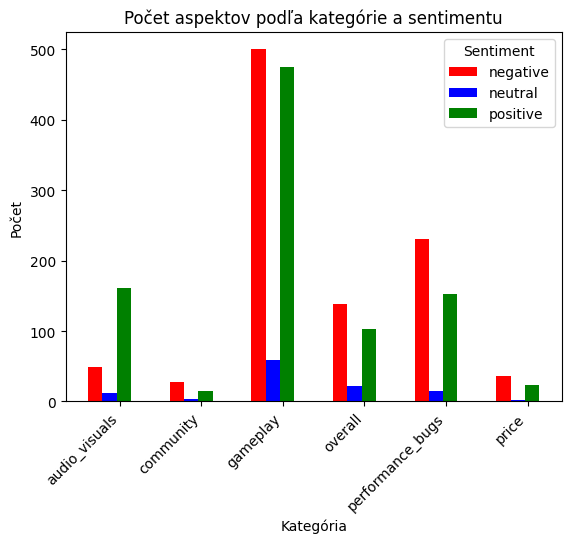

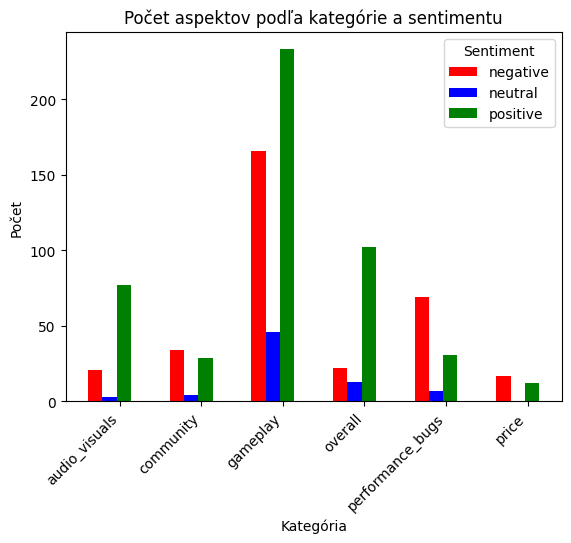

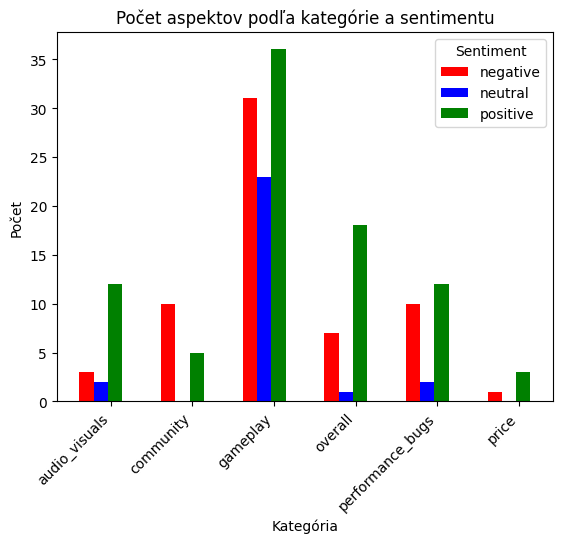

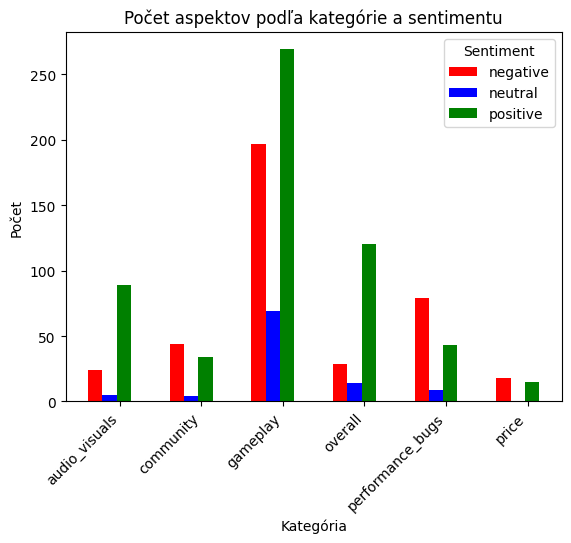

In [14]:
# only acos dataset
dataset = findfile.find_dir('../../../../integrated_datasets/acos_datasets', '1335.GamesAcos')
train = data_utils.read_json(dataset, data_type="train.main_categories")
test = data_utils.read_json(dataset, data_type="test.main_categories")

dataset2 = findfile.find_dir('../../../../integrated_datasets/acos_datasets', '1336.Games')
train2 = data_utils.read_json(dataset2, data_type="train.main_categories")
test2 = data_utils.read_json(dataset2, data_type="test.main_categories")

print(len(train))
print(len(test))
print(len(train2))
print(len(test2))

# create df with text of every train, test, train2 and test2

df_train = pd.DataFrame(train, columns=['text'])
df_test = pd.DataFrame(test, columns=['text'])
df_train2 = pd.DataFrame(train2, columns=['text'])
df_test2 = pd.DataFrame(test2, columns=['text'])

df = pd.concat([df_train, df_test, df_train2, df_test2])
df['text_length'] = df['text'].apply(lambda x: len(x))

ax = df['text_length'].hist(bins=100)
fig = ax.get_figure()
ax.set_title('Distribúcia dĺžky recenzie')
ax.set_xlabel('Dĺžka recenzie (v znakoch)')
ax.set_ylabel('Počet recenzií')
fig.savefig(f"distibution_of_length.pdf", bbox_inches='tight')
plt.show()


def visualize_aspects_stats(datasets, files):
    # to pandas dataframe for easier manipulation
    dfs = [pd.DataFrame([{**{'text': item['text']}, **label} for item in dataset for label in item['labels']]) for
           dataset in datasets]

    df_concat = pd.concat(dfs)
    dfs.append(df_concat)

    # group by text and counts for each category and polarity
    for df, file in zip(dfs, [*files, files[0].split('.')[0]]):
        # Group the data by category and polarity, and count the number of occurrences
        grouped_data = df.groupby(['category', 'polarity']).size().reset_index(name='count')

        # Get unique categories and polarities
        # remove NULL or none
        grouped_data = grouped_data[grouped_data['category'] != 'NULL']
        grouped_data = grouped_data[grouped_data['category'] != 'none']

        categories = grouped_data['category'].unique()
        polarities = grouped_data['polarity'].unique()



        # Make sure there is data for every combination of category and polarity
        full_data = pd.DataFrame([(c, p, 0) for c in categories for p in polarities],
                                 columns=['category', 'polarity', 'count'])
        grouped_data = pd.merge(full_data, grouped_data, on=['category', 'polarity'], how='left').fillna(0)
        grouped_data['count'] = grouped_data['count_x'] + grouped_data['count_y']

        # print percentages of aspect counts per category and polarity and total aspects per category
        print(file)
        for category in categories:
            category_data = grouped_data[grouped_data['category'] == category]
            total = category_data['count'].sum()
            print(category)
            for polarity in polarities:
                polarity_data = category_data[category_data['polarity'] == polarity]
                count = polarity_data['count'].sum()
                print(f"{polarity}: {count:.0f} ({count / total * 100:.2f}%)")
            # print count of total aspects per category and as percentage of total aspects
            sum = grouped_data['count'].sum()
            print(f"total: {total:.0f} ({total / sum * 100:.2f}%)")
            print()

        bar_width = 0.35
        spacing = 1.0
        bar_positions = np.arange(len(categories)) * (1 + spacing)

        # Define the color mapping for polarities
        color_map = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}

        fig, ax = plt.subplots()
        for index, polarity in enumerate(polarities):
            polarity_data = grouped_data[grouped_data['polarity'] == polarity]
            ax.bar(bar_positions + (index - len(polarities) / 2.5) * bar_width, polarity_data['count'], width=bar_width,
                   label=polarity, color=color_map.get(polarity, "orange"))

        ax.set_xticks(bar_positions + bar_width / 2)
        ax.set_xticklabels(categories, rotation=45, ha='right')
        ax.set_xlabel('Kategória')
        ax.set_ylabel('Počet')
        ax.set_title('Počet aspektov podľa kategórie a sentimentu')
        ax.legend(title='Sentiment', )
        fig.savefig(f"{file}.pdf", bbox_inches='tight')




# Show the plot
visualize_aspects_stats([train, test],
                        ["GamesACOS.train", "GamesACOS.test", ])
visualize_aspects_stats([train2, test2], ["GamesACS.train", "GamesACS.test"])
plt.show()

In [ ]:
import random

# only acs dataset
dataset = findfile.find_dir('../../../../integrated_datasets/acos_datasets', '1337.Games')
train = data_utils.read_json(dataset, data_type="train")
test = data_utils.read_json(dataset, data_type="test")

#pick random sample of 100
train_rnd = random.sample(train, 100)
# print percentages of each category
df_rnd = pd.DataFrame([{**{'text': item['text']}, **label} for item in train_rnd for label in item['labels']])
grouped_data = df_rnd.groupby(['category', 'polarity']).size().reset_index(name='count')
grouped_data = grouped_data[grouped_data['category'] != 'NULL']
grouped_data = grouped_data[grouped_data['category'] != 'none']
categories = grouped_data['category'].unique()
polarities = grouped_data['polarity'].unique()
print(categories)
# print statictics
for category in categories:
    print(category)
    for polarity in polarities:
        print(polarity, len(df_rnd[(df_rnd['category'] == category) & (df_rnd['polarity'] == polarity)]))
    print('')

visualize_aspects_stats([train, test], ["1337.Games.train", "1337.Games.test"])
# Show the plot
plt.show()

['joint-acos-1333.Games_ACS-mt5_acos_on_all_data_logs.json', 'joint-acos-1333.Games_ACS-on_all_data_logs.json', 'joint-acos-1335.GamesACOS-acos_finetuned_on_acs_on_all_data_logs.json', 'joint-acos-1335.GamesACOS-byt5-base-i2eg-2b_logs.json', 'joint-acos-1335.GamesACOS-byt5-small-after-ood_logs.json', 'joint-acos-1335.GamesACOS-finetuned_acos_on_ood_model_logs.json', 'joint-acos-1335.GamesACOS-mt5-base-joint-acos-1335.GamesACOS_logs.json', 'joint-acos-1335.GamesACOS-mt5_acos_only_logs.json', 'joint-acos-1335.GamesACOS-on_acos_only_logs.json', 'joint-acos-506.Synthetic-byt5-base_logs.json', 'joint-acos-506.Synthetic-ood_data_logs.json', 'joint-aspect-category-sentiment-1333.Games_ACS-mt5-base-i2eg-20e_logs.json', 'joint-aspect-category-sentiment-1333.Games_ACS-mt5-base-i2eg_logs.json', 'joint-aspect-category-sentiment-1333.Games_ACS-mt5-base_logs.json', 'joint-aspect-category-sentiment-1333.Games_ACS-on_all_data_logs.json']
joint-acos-1333.Games_ACS-mt5_acos_on_all_data_logs.json
train_l

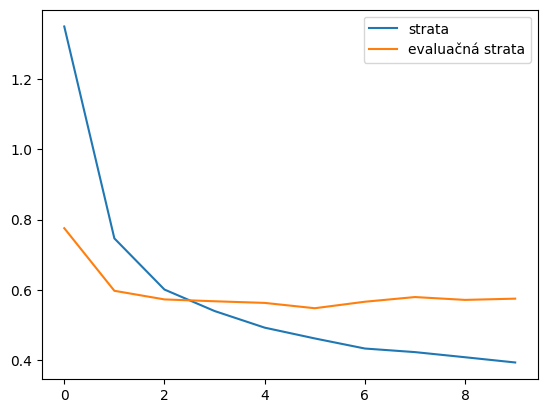

joint-acos-1335.GamesACOS-byt5-small-after-ood_logs.json
train_loss or eval_loss is empty
joint-acos-1335.GamesACOS-finetuned_acos_on_ood_model_logs.json


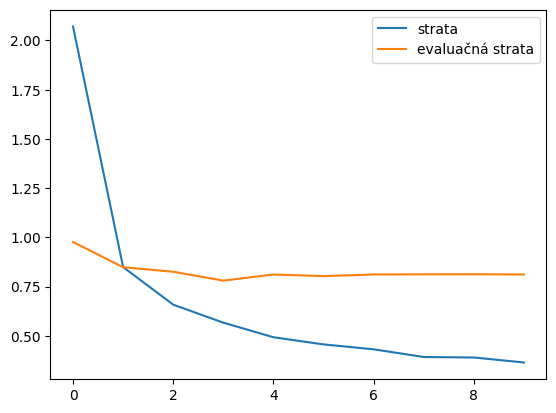

joint-acos-1335.GamesACOS-mt5-base-joint-acos-1335.GamesACOS_logs.json
train_loss and eval_loss have different length
joint-acos-1335.GamesACOS-mt5_acos_only_logs.json
train_loss and eval_loss have different length
joint-acos-1335.GamesACOS-on_acos_only_logs.json
train_loss and eval_loss have different length
joint-acos-506.Synthetic-byt5-base_logs.json
train_loss and eval_loss have different length
joint-acos-506.Synthetic-ood_data_logs.json


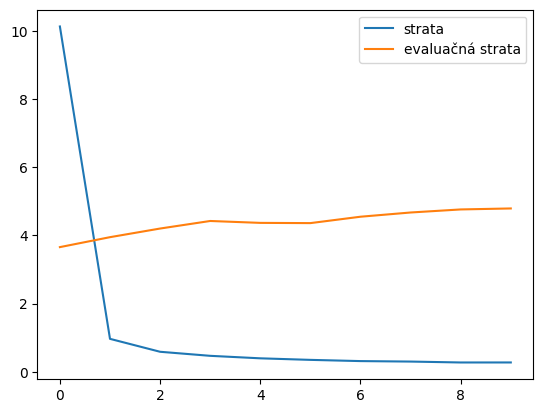

joint-aspect-category-sentiment-1333.Games_ACS-mt5-base-i2eg-20e_logs.json


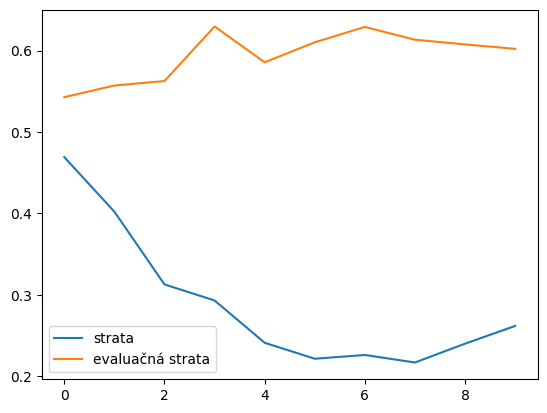

joint-aspect-category-sentiment-1333.Games_ACS-mt5-base-i2eg_logs.json


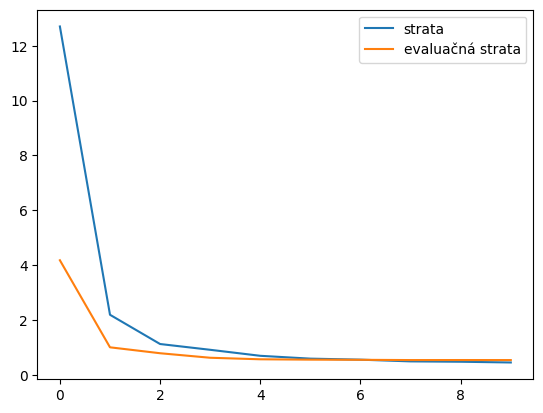

joint-aspect-category-sentiment-1333.Games_ACS-mt5-base_logs.json
train_loss or eval_loss is empty
joint-aspect-category-sentiment-1333.Games_ACS-on_all_data_logs.json
train_loss and eval_loss have different length


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import findfile

# find log files from training
log_files = findfile.find_cwd_files('logs')
print(log_files)

# plot each train_loss and eval_loss for each log file of json string
# log file is a json file {train_loss:[1.0,0.9...], eval_loss:[1.0,0.9...]}
# match the number of train_loss and eval_loss and plot them

for log_file in log_files:
    print(log_file)
    with open(log_file, 'r', encoding='utf8') as f:
        data = json.load(f)
        train_loss = data['train_loss']
        eval_loss = data['eval_loss']
        if len(train_loss) == 0 or len(eval_loss) == 0:
            print("train_loss or eval_loss is empty")
            continue
        if len(train_loss) != len(eval_loss):
            print("train_loss and eval_loss have different length")
            # duplicate missing values in eval_loss
            eval_loss = np.repeat(eval_loss, len(train_loss) // len(eval_loss))
            continue

        plt.plot(np.arange(0, len(train_loss)), train_loss, label='strata')
        plt.plot(np.arange(0, len(train_loss)), eval_loss, label='evaluačná strata')
        plt.legend()
        plt.show()






C:\Users\Fergons\AppData\Local\Temp\ipykernel_7720\4038109381.py:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='checkpoints/multitask/joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\\trainer_state.json' mode='r' encoding='utf8'>
  data = json.load(open(file, 'r', encoding='utf8'))
2023-04-29 21:39:24,826 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-29 21:39:24,846 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-29 21:39:24,846 - DEBUG: Writing TrueType font.


FindFile Warning --> multiple targets ['checkpoints/multitask/joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\\checkpoint-1242\\trainer_state.json', 'checkpoints/multitask/joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\\checkpoint-1656\\trainer_state.json', 'checkpoints/multitask/joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\\checkpoint-2070\\trainer_state.json', 'checkpoints/multitask/joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\\checkpoint-2484\\trainer_state.json', 'checkpoints/multitask/joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\\checkpoint-2898\\trainer_state.json', 'checkpoints/multitask/joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\\checkpoint-3312\\trainer_state.json', 'checkpoints/multitask/joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\\checkpoint-3726\\trainer_state.json', 'checkpoints/multitask/joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\\checkpoint-414\\trainer_state.json', 'checkpoints/multitask/joint-acos-1335.GamesACOS-byt5-base-i2eg-2b\\checkpoint-4140\\trainer_state.json', 'checkpo

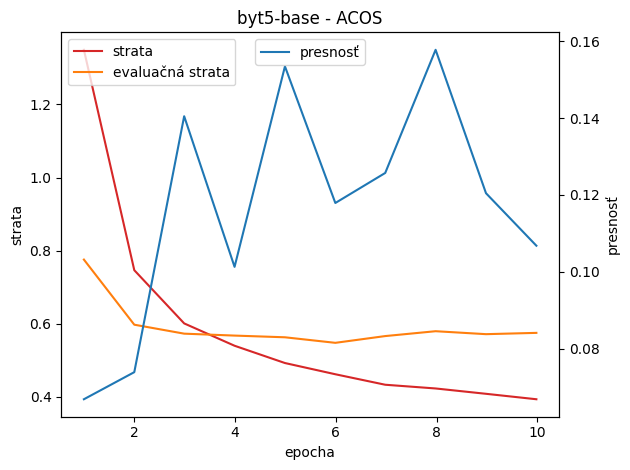

C:\Users\Fergons\AppData\Local\Temp\ipykernel_7720\4038109381.py:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='checkpoints/multitask/joint-acos-1335.GamesACOS-finetuned_acos_on_ood_model\\trainer_state.json' mode='r' encoding='utf8'>
  data = json.load(open(file, 'r', encoding='utf8'))
2023-04-29 21:39:25,044 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-29 21:39:25,082 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-29 21:39:25,083 - DEBUG: Writing TrueType font.


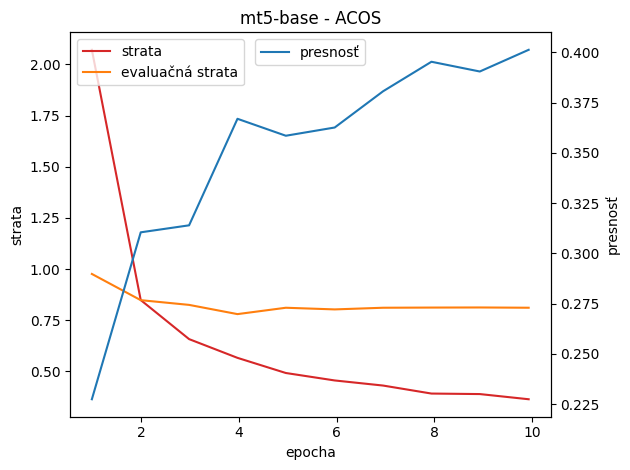

C:\Users\Fergons\AppData\Local\Temp\ipykernel_7720\4038109381.py:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='checkpoints/multitask/joint-acs-1333.Games_ACS-mt5-base-i2eg\\trainer_state.json' mode='r' encoding='utf8'>
  data = json.load(open(file, 'r', encoding='utf8'))
2023-04-29 21:39:25,260 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-29 21:39:25,281 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-29 21:39:25,282 - DEBUG: Writing TrueType font.


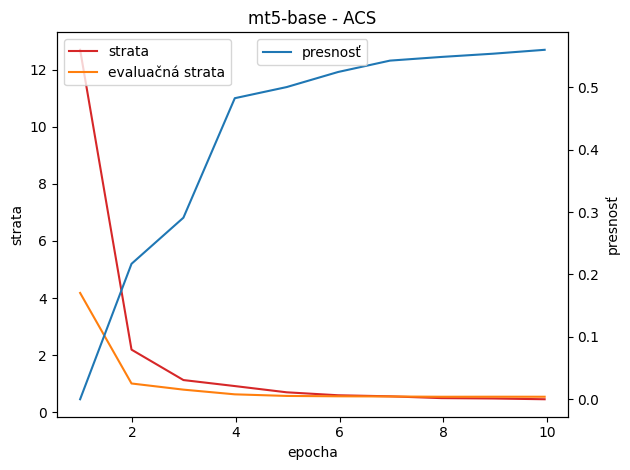

C:\Users\Fergons\AppData\Local\Temp\ipykernel_7720\4038109381.py:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='checkpoints/multitask/joint-acs-1333.Games_ACS-byt5-base-i2eg-2b\\trainer_state.json' mode='r' encoding='utf8'>
  data = json.load(open(file, 'r', encoding='utf8'))
2023-04-29 21:39:25,457 - DEBUG: Assigning font /F1 = 'D:\\PythonProjects\\SentimentAnalysis\\venv3.8\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
2023-04-29 21:39:25,479 - DEBUG: Embedding font D:\PythonProjects\SentimentAnalysis\venv3.8\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
2023-04-29 21:39:25,479 - DEBUG: Writing TrueType font.


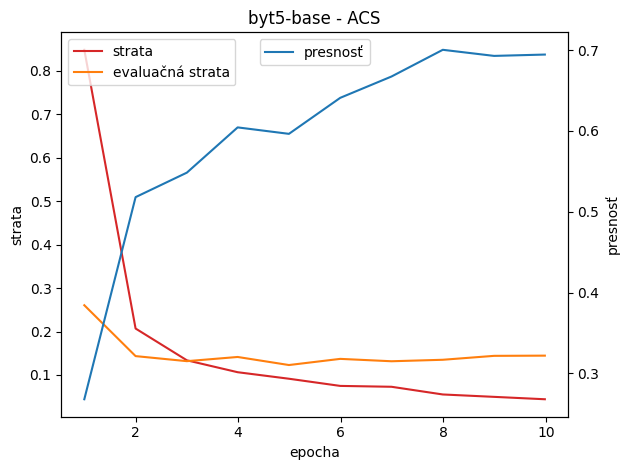

In [27]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import findfile

# find log files from training
models = ["joint-acos-1335.GamesACOS-byt5-base-i2eg-2b","joint-acos-1335.GamesACOS-finetuned_acos_on_ood_model","joint-acs-1333.Games_ACS-mt5-base-i2eg", "joint-acs-1333.Games_ACS-byt5-base-i2eg-2b"]
models_names = ["byt5-base - ACOS","mt5-base - ACOS","mt5-base - ACS", "byt5-base - ACS"]
log_files = [findfile.find_file(f'checkpoints/multitask/{model}', 'trainer_state.json') for model in models]
print(log_files)
for file, model_name in zip(log_files, models_names):
    data = json.load(open(file, 'r', encoding='utf8'))
    log_history = data['log_history']
    epochs = []
    losses = []
    eval_losses = []
    accuracies = []

    for item in log_history:
        if "epoch" in item and "loss" in item:
            epochs.append(item["epoch"])
            losses.append(item["loss"])
        if "epoch" in item and "eval_loss" in item:
            eval_losses.append(item["eval_loss"])
        if "epoch" in item and "accuracy" in item:
            accuracies.append(item["accuracy"])

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('epocha')
    ax1.set_ylabel('strata', color="black")
    ax1.plot(epochs, losses, color=color, label='strata')
    ax1.plot(epochs, eval_losses, color='tab:orange', label='evaluačná strata')
    ax1.tick_params(axis='y', labelcolor="black")
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('presnosť', color="black")  # We already handled the x-label with ax1
    ax2.plot(epochs, accuracies, color=color, label='presnosť')
    ax2.tick_params(axis='y', labelcolor="black")
    ax2.legend(loc='upper center')

    plt.title(f"{model_name}")
    fig.tight_layout()  # Otherwise the right y-label is slightly clipped
    fig.savefig(f"{model_name}.pdf", bbox_inches='tight')
    plt.show()




